#Download the dataset:
https://www.kaggle.com/kazanova/sentiment140

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP projects/Text_Classfication/training.csv",
                 encoding = 'ISO-8859-1', names = ['target','id','date','flag','user','text'])

In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.target.unique()

array([0, 4])

In [ ]:
df.loc[5,['target','text']]

target                                0
text      @Kwesidei not the whole crew 
Name: 5, dtype: object

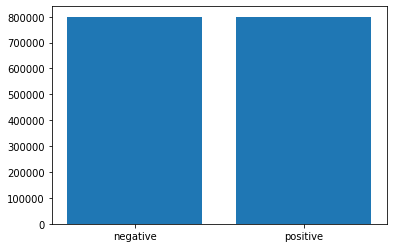

In [ ]:
classes = df.target.unique()

counts= []
for i in classes:
  count = len(df[df.target==i])
  counts.append(count)

plt.bar(['negative','positive'], counts)
plt.show()

Even clas distribution heps us a lot in text classification. Imagine a situation where 95% of the data is in one class and the rest 5% split among other 5 classes or Imabalanced dataset. If we would'nt do anything about it model would just learn to guess the 95% class all the time and would be correct 95% of the time on the data we would use.

# Vectorize

In [ ]:
# In arrays
x = df.text.values
y = df.target.values

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =45)

In [ ]:
x_train

array(['@PreciousGemGem thanks! will investigate ',
       'lets begin our day withhh smileeeee ',
       "@Alyssa_Milano Can't wait! I hope your character chooses the novelist ",
       ...,
       '@bobbyllew Not to mention understanding of biology, in many areas ',
       'Go Vettel! F1 Qualifying is so exciting.  Finally got to watch it a bit ago. May head to bed early. Awfully tired today.',
       'at the asian household  converting to asianism soon.'],
      dtype=object)

In [ ]:
# vectorizing
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train = vectorizer.transform(x_train)

In [ ]:
X_test = vectorizer.transform(x_test)

In [ ]:
print(x_train[0],"\n", X_train[0])

@PreciousGemGem thanks! will investigate  
   (0, 255638)	1
  (0, 422453)	1
  (0, 516955)	1
  (0, 565608)	1


Now the sparse matrix you see corresponds to index of the word and count of it in the tweet. Keep in mind it's not in the same order as in the tweet. You can check the corresponding values using vocabulary of the vectorizer.

In [ ]:
#Didnt understand the countvectorzer tuple

In [ ]:
import re

# Given delimeter and joining them in regular exp
d = ",.!?/&-:;@'..."
t = "["+"\\".join(d)+"]"

#Clean up the string
s = x_train[0] 
s = ' '.join(w for w in re.split(t,s) if w)

# Return the index
for i in s.split():
  if len(i) >1 :
    print(i , vectorizer.vocabulary_[i.lower()])

PreciousGemGem 422453
thanks 516955
will 565608
investigate 255638


# Modelling (Logistic)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print("Accuracy: ", score)

Accuracy:  0.798371875


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Confusion Matrix

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=df.target.unique())
df_cm = pd.DataFrame(cm, index=df.target.unique(), columns=df.target.unique())
df_cm

,0,4
0,124552,35200
4,29321,130927


In [ ]:
# For better understanding we could check for percentages
df_cm_p = df_cm.copy()
for i in df_cm_p:
  df_cm_p[i]/=df_cm_p[i].sum()

df_cm_p

,0,4
0,0.809447,0.211886
4,0.190553,0.788114


# Test

In [ ]:
tweet = "PATRIOTIC AMERICANS DON'T STAND  WITH PRESIDENT TRUMP!!"
vec_tweet = vectorizer.transform(np.array([tweet]))

prediction = classifier.predict(vec_tweet)
print("Tweet is ",'positive' if prediction[0]==4 else 'negative')

Tweet is  negative


In [ ]:
# Multiple tweet
tweet_lst = ['Best tweet ever', 'Mondays are worst..']
vec_tweet1 = vectorizer.transform(np.array(tweet_lst))

prediction1 = classifier.predict(vec_tweet1)
for enum, i in enumerate(tweet_lst):
  print(i , "This tweet is", "positive" if prediction1[0]==4 else "negative")

Best tweet ever This tweet is positive
Mondays are worst.. This tweet is positive


# Modelling (Naive Bayes)

In [ ]:
from sklearn import naive_bayes
classifier1 = naive_bayes.MultinomialNB()
classifier1.fit(X_train, y_train)

score = classifier1.score(X_test, y_test)

print("Accuracy: ", score)

Accuracy:  0.78080625


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
y_pred1 = classifier1.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred1, labels=df.target.unique())
df_cm2 = pd.DataFrame(cm2, index=df.target.unique(), columns=df.target.unique())
df_cm2

,0,4
0,130706,29046
4,41096,119152


In [ ]:
# For better understanding we could check for percentages
df_cm_p2 = df_cm2.copy()
for i in df_cm_p2:
  df_cm_p2[i]/=df_cm_p2[i].sum()

df_cm_p2

,0,4
0,0.760794,0.195995
4,0.239206,0.804005


In [ ]:
tweet = "AMERICANS DON'T STAND  WITH PRESIDENT TRUMP!!"
vec_tweet = vectorizer.transform(np.array([tweet]))

prediction2 = classifier1.predict(vec_tweet)
print("Tweet is ",'positive' if prediction2[0]==4 else 'negative')

Tweet is  positive


In [ ]:
# Multiple tweet
tweet_lst = ['Best tweet ever', 'Mondays are worst..']
vec_tweet1 = vectorizer.transform(np.array(tweet_lst))

prediction4 = classifier1.predict(vec_tweet1)
for enum, i in enumerate(tweet_lst):
  print(i , "This tweet is", "positive" if prediction4[0]==4 else "negative")

Best tweet ever This tweet is positive
Mondays are worst.. This tweet is positive
